<div style="text-align: center; font-size: 20px;"><b>Stats216v: Statistical Learning</b></div>

<br>
<div style="text-align: center">Stanford University</div>
<div style="text-align: center">Summer 2017</div>
<div style="text-align: center">Gyu-Ho Lee (<a href="mailto:gyuhox@gmail.com">gyuhox@gmail.com</a>)</div>

#### 7. Moving Beyond Linearity

In [55]:
LoadLibraries = function() {
    library(MASS)
    install.packages("ISLR")
    library(ISLR)
    install.packages("gam")
    library(gam)
    install.packages("akima")
    library(akima)
    print("Libraries have been loaded!")
}

LoadLibraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency 'sp'

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "Libraries have been loaded!"


In [4]:
fit = lm(wage~poly(age,4), data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


In [7]:
# raw=T, use raw and not orthogonal polynomials.
fit2 = lm(wage~poly(age,4,raw=T), data=Wage)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = T)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = T)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [9]:
agelims = range(Wage$age)
age.grid = seq(from=agelims[1], to=agelims[2])
preds = predict(fit, newdata=list(age=age.grid), se=TRUE)
se.bands = cbind(preds$fit+2*preds$se.fit, preds$fit-2*preds$se.fit)

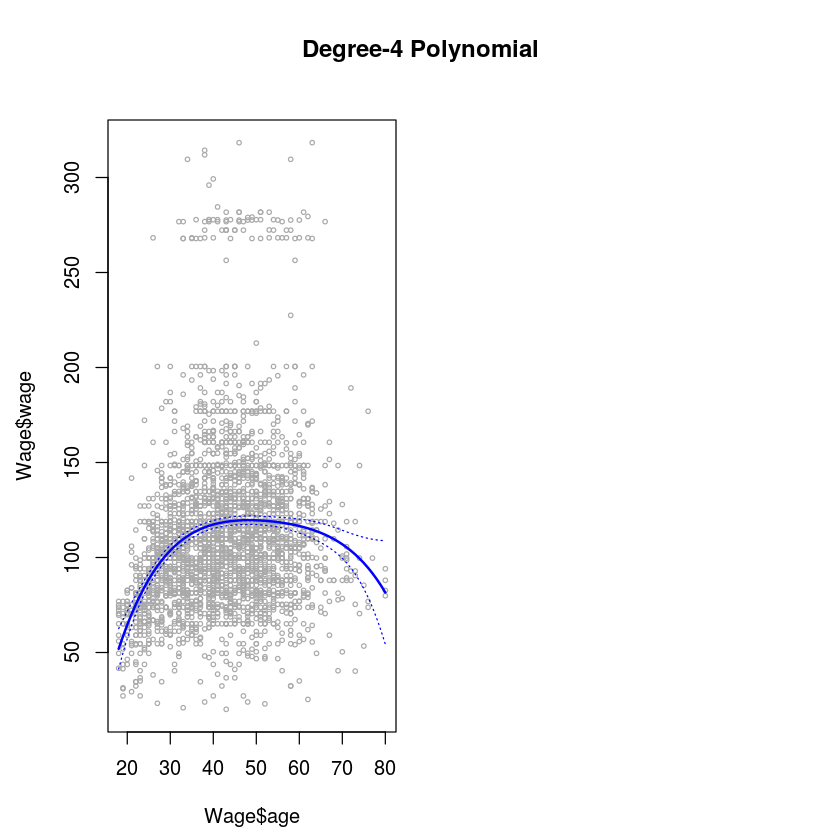

In [14]:
par(mfrow=c(1,2), mar=c(4.5,4.5,1,1), oma=c(0,0,4,0))
plot(Wage$age, Wage$wage, xlim=agelims, cex=.5, col="darkgrey")
title("Degree-4 Polynomial", outer=T)
lines(age.grid, preds$fit, lwd=2, col="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

In [16]:
# preds = predict(fit, newdata=list(age=age.grid), se=TRUE)
preds2 = predict(fit2, newdata=list(age=age.grid), se=TRUE)
max(abs(preds$fit-preds2$fit))

[1] 7.81597e-11

In [17]:
# decide degree of polynomial to use
fit.1 = lm(wage~age, data=Wage)
fit.2 = lm(wage~poly(age,2), data=Wage)
fit.3 = lm(wage~poly(age,3), data=Wage)
fit.4 = lm(wage~poly(age,4), data=Wage)
fit.5 = lm(wage~poly(age,5), data=Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)

# fit.4 with p-value 5%, so reasonable

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


In [18]:
# instead p-values more succinctly
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


In [19]:
fit.6 = lm(wage~education+age, data=Wage)
fit.7 = lm(wage~education+poly(age,2), data=Wage)
fit.8 = lm(wage~education+poly(age,3), data=Wage)
anova(fit.6, fit.7, fit.8)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2994,3867992,NA,NA,NA,NA
2993,3725395,1,142597.10,114.696898,2.728971e-26
2992,3719809,1,5586.66,4.493588,3.410431e-02


In [21]:
# polynomial logistic regression
fit = glm(I(wage>250)~poly(age,4), data=Wage, family=binomial)

# predictions for the logit
preds = predict(fit, newdata=list(age=age.grid), se=T)
# directly compute preds
preds.res = predict(fit, newdata=list(age=age.grid), se=T, type="response")

In [22]:
pfit = exp(preds$fit) / (1+exp(preds$fit))
se.bands.logit = cbind(preds$fit+2*preds$se.fit, preds$fit-2*preds$se.fit)
se.bands = exp(se.bands.logit) / (1+exp(se.bands.logit))

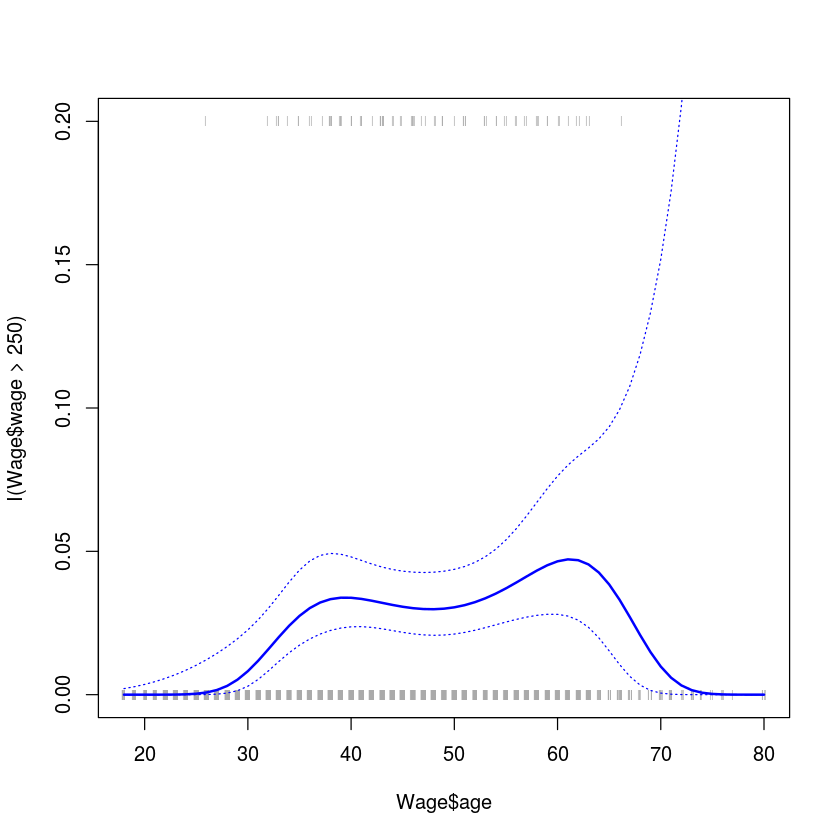

In [27]:
plot(Wage$age, I(Wage$wage>250), xlim=agelims, type="n", ylim=c(0,.2))
points(jitter(Wage$age), I((Wage$wage>250)/5), cex=.5, pch="|", col="darkgrey")
lines(age.grid, pfit, lwd=2, col="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

In [31]:
# fit step function
table(cut(Wage$age,4))
fit = lm(wage~cut(Wage$age,4), data=Wage)
coef(summary(fit))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(Wage$age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(Wage$age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(Wage$age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


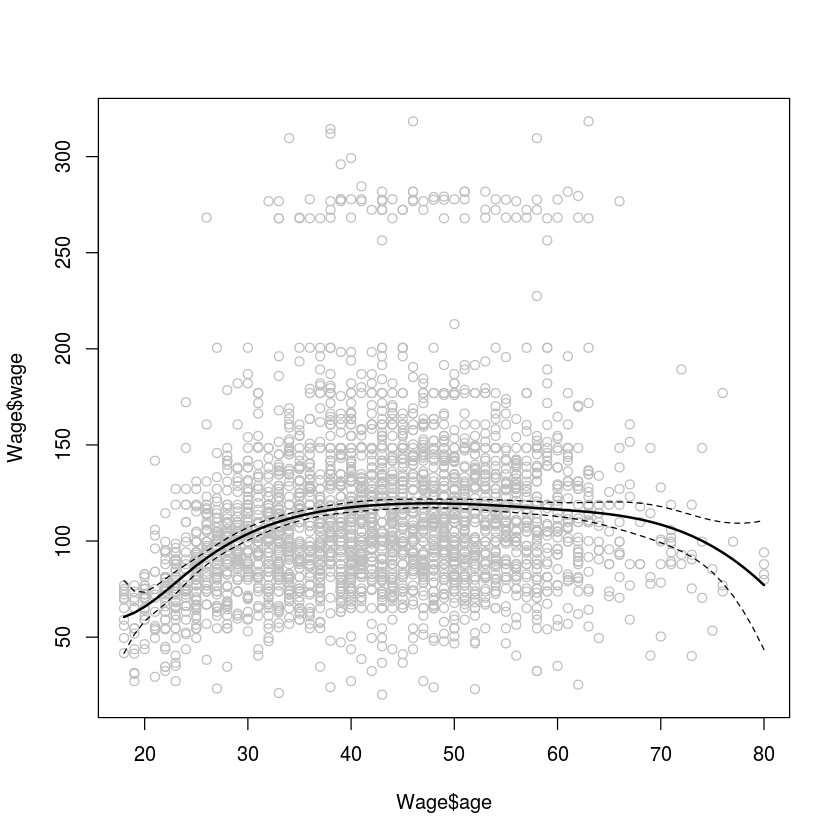

In [32]:
library(splines)

# bs to generate basic function
fit = lm(wage~bs(age, knots=c(25,40,60)), data=Wage)
pred = predict(fit, newdata=list(age=age.grid), se=T)
plot(Wage$age, Wage$wage, col="gray")
lines(age.grid, pred$fit, lwd=2)
lines(age.grid, pred$fit+2*pred$se, lty="dashed")
lines(age.grid, pred$fit-2*pred$se, lty="dashed")

In [33]:
attr(bs(Wage$age, df=6), "knots")

25%   50%   75% 
33.75 42.00 51.00

In [35]:
# natural spline
fit2 = lm(wage~ns(Wage$age, df=4), data=Wage)
pred2 = predict(fit2, newdata=list(age=age.grid), se=T)
# lines(age.grid, pred2$fit, col="red", lwd=2)

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


Warning message in smooth.spline(Wage$age, Wage$wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"

[1] 6.794596

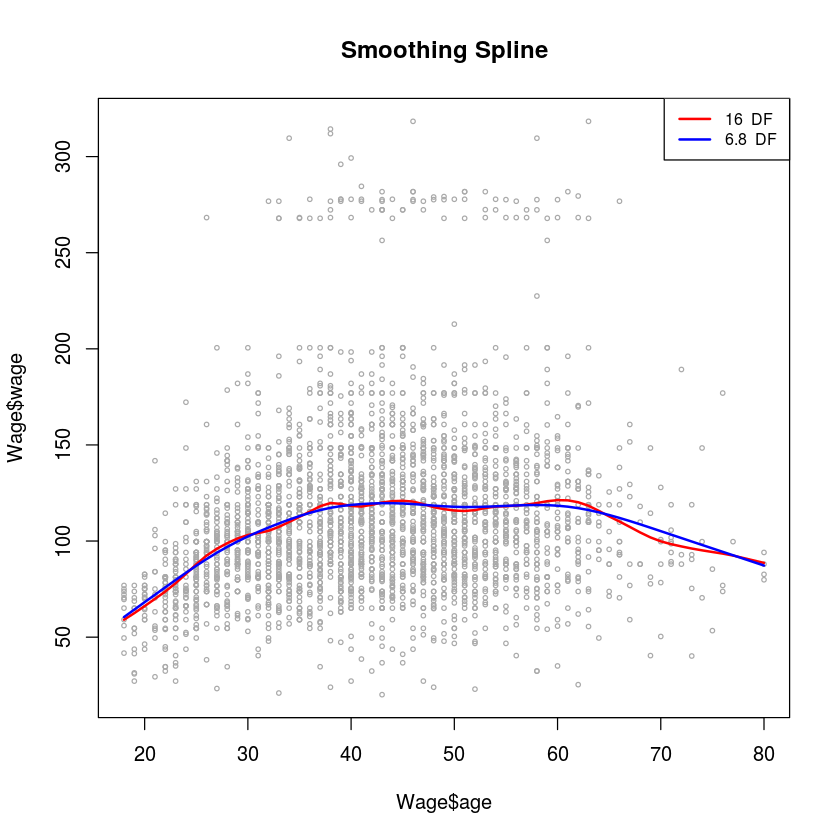

In [43]:
plot(Wage$age, Wage$wage, xlim=agelims, cex=.5, col="darkgrey")
title("Smoothing Spline")
fit = smooth.spline(Wage$age, Wage$wage, df=16)
fit2 = smooth.spline(Wage$age, Wage$wage, cv=TRUE)
fit2$df

lines(fit, col="red", lwd=2)
lines(fit2, col="blue", lwd=2)
legend("topright", legend=c("16  DF","6.8  DF"), col=c("red","blue"), lty=1, lwd=2, cex=.8)

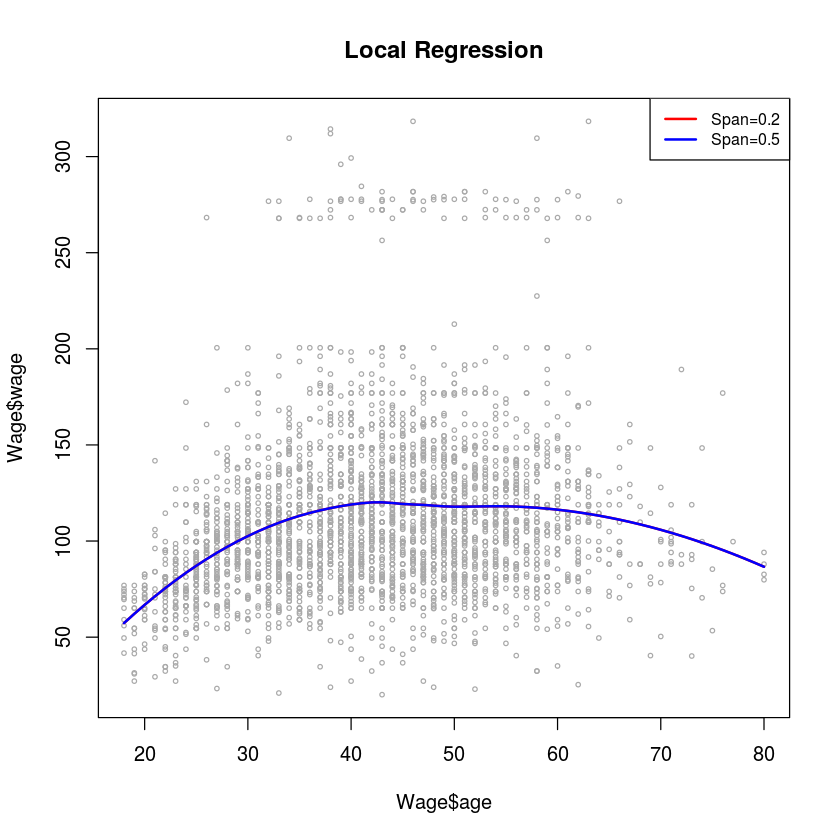

In [44]:
plot(Wage$age, Wage$wage, xlim=agelims, cex=.5, col="darkgrey")
title("Local Regression")
fit = loess(wage~age, spin=.2, data=Wage)
fit2 = loess(wage~age, spin=.5, data=Wage)
lines(age.grid, predict(fit, data.frame(age=age.grid)), col="red", lwd=2)
lines(age.grid, predict(fit2, data.frame(age=age.grid)), col="blue", lwd=2)
legend("topright", legend=c("Span=0.2","Span=0.5"), col=c("red","blue"), lty=1, lwd=2, cex=.8)

In [45]:
# GAM
gam1 = lm(wage~ns(year,4)+ns(age,5)+education, data=Wage)
gam1


Call:
lm(formula = wage ~ ns(year, 4) + ns(age, 5) + education, data = Wage)

Coefficients:
                (Intercept)                 ns(year, 4)1  
                     46.949                        8.625  
               ns(year, 4)2                 ns(year, 4)3  
                      3.762                        8.127  
               ns(year, 4)4                  ns(age, 5)1  
                      6.806                       45.170  
                ns(age, 5)2                  ns(age, 5)3  
                     38.450                       34.239  
                ns(age, 5)4                  ns(age, 5)5  
                     48.678                        6.557  
        education2. HS Grad     education3. Some College  
                     10.983                       23.473  
   education4. College Grad  education5. Advanced Degree  
                     38.314                       62.554  


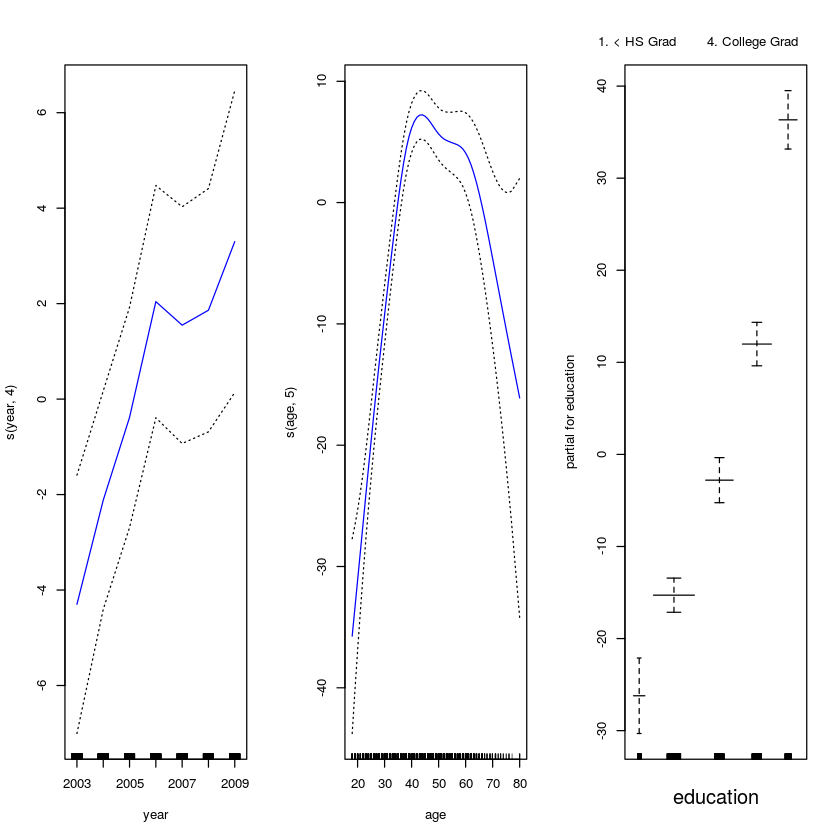

In [48]:
library(gam)
gam.m3 = gam(wage~s(year,4)+s(age,5)+education, data=Wage)
par(mfrow=c(1,3))
plot(gam.m3, se=TRUE, col="blue")

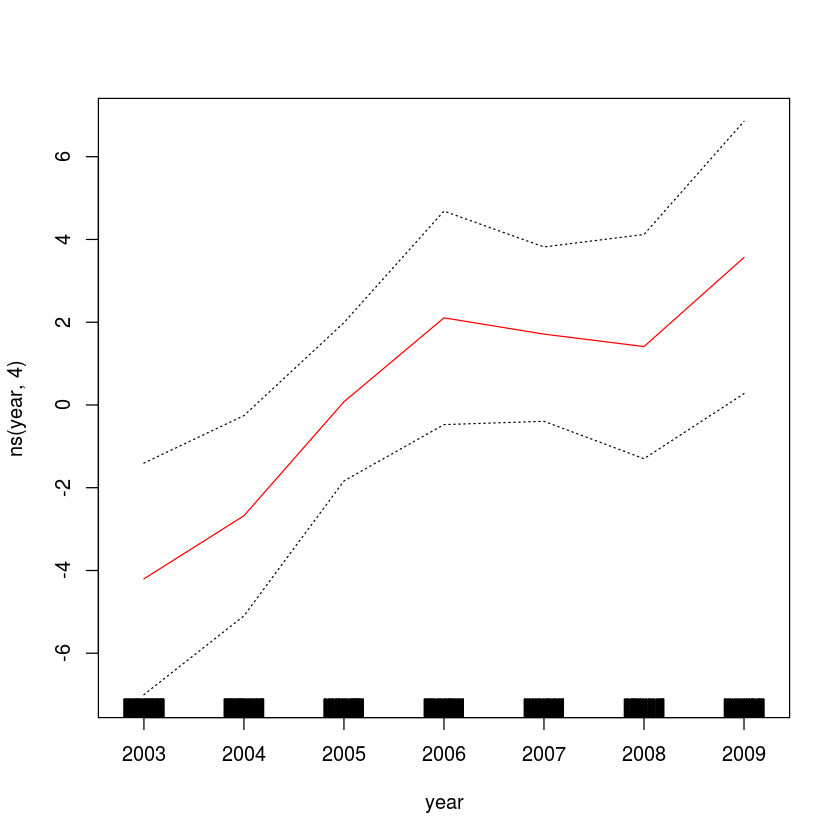

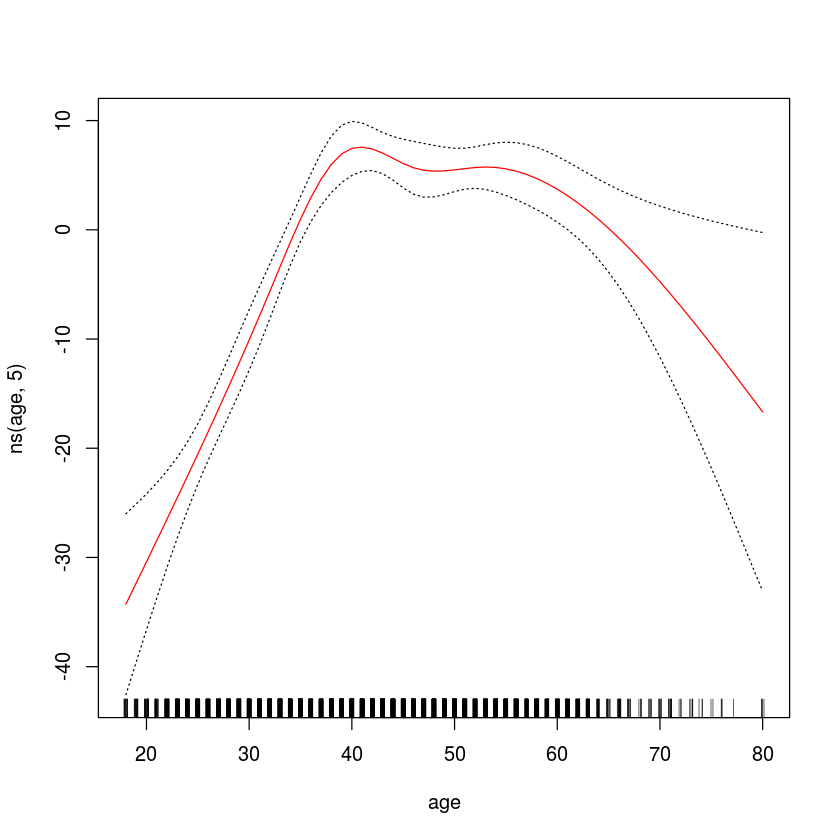

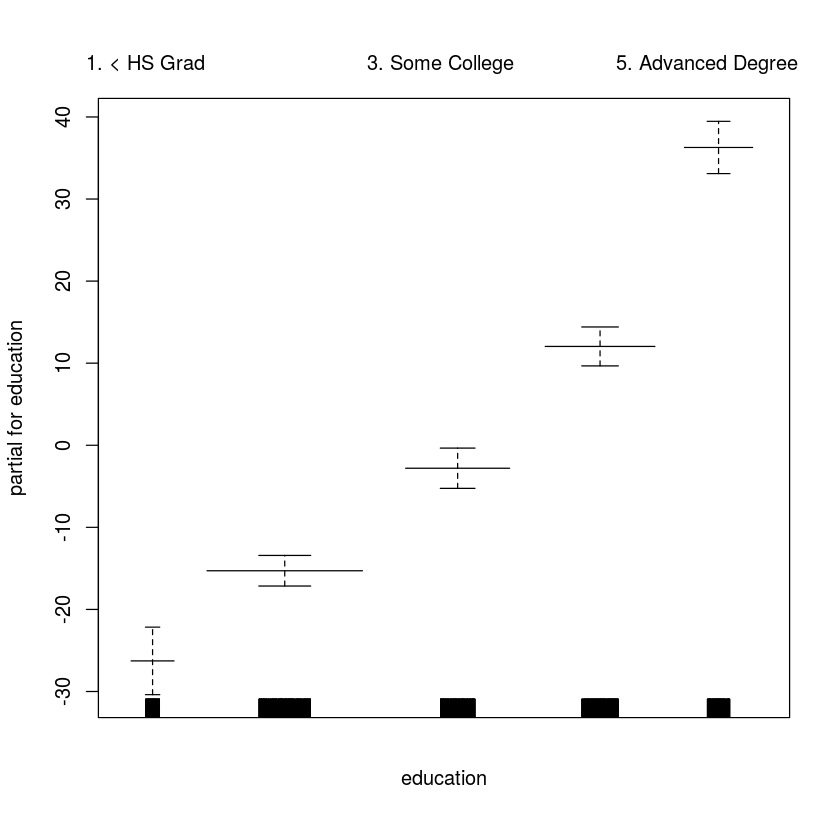

In [49]:
plot.gam(gam1, se=TRUE, col="red")

In [50]:
gam.m1 = gam(wage~s(age,5)+education, data=Wage)
gam.m2 = gam(wage~year+s(age,5)+education, data=Wage)
# gam.m3 = gam(wage~s(year,4)+s(age,5)+education, data=Wage)
anova(gam.m1, gam.m2, gam.m3, test="F")

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
2990,3711731,NA,NA,NA,NA
2989,3693842,1.000000,17889.243,14.477130,0.0001447167
2986,3689770,2.999989,4071.134,1.098212,0.3485661430


In [51]:
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
---

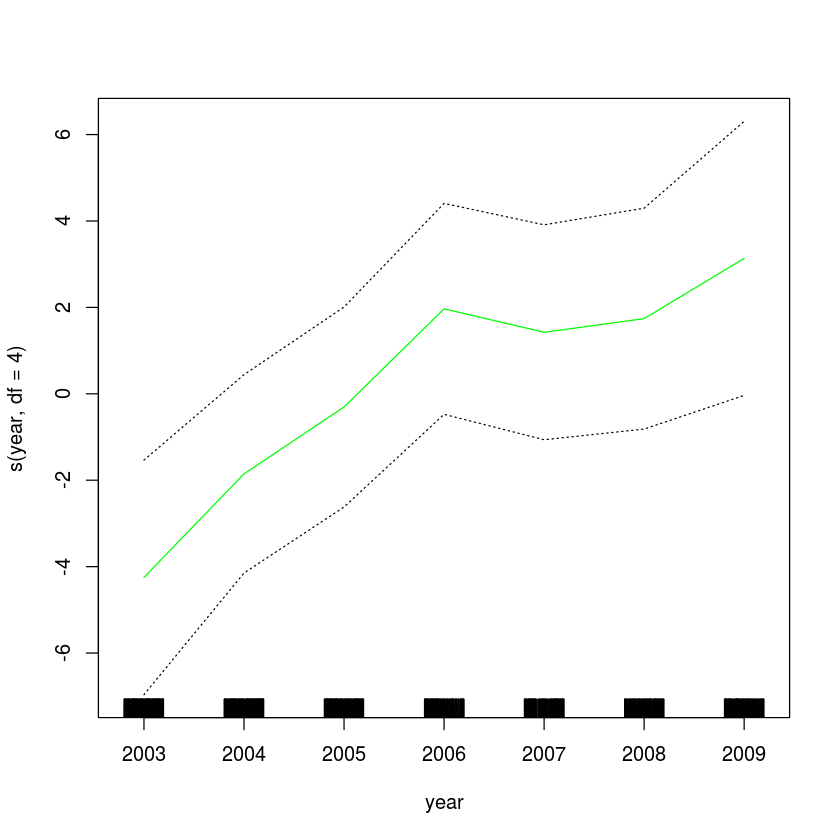

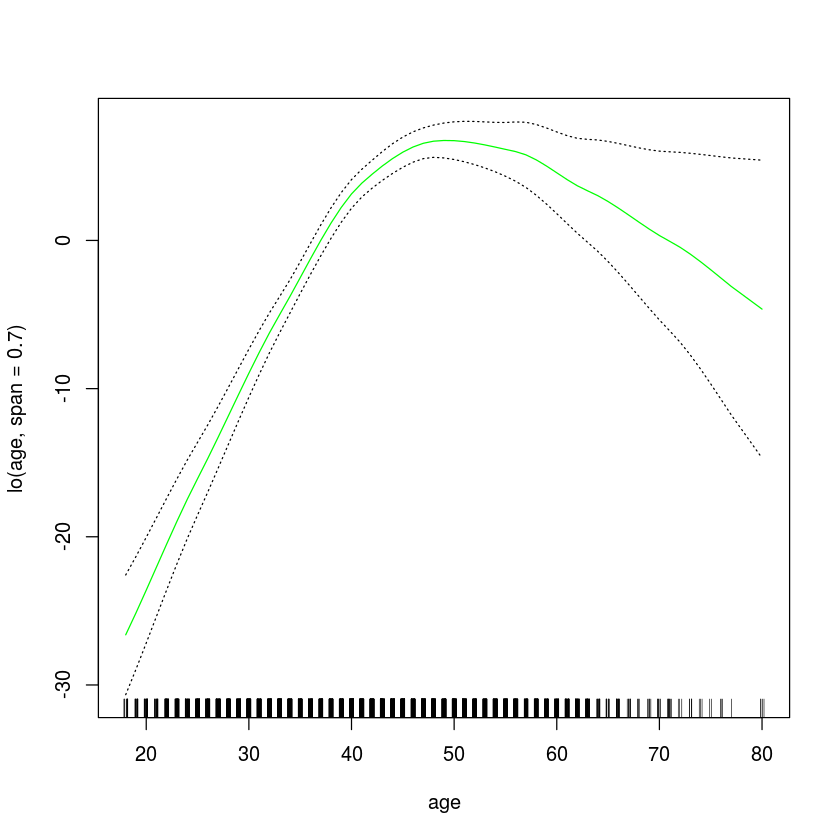

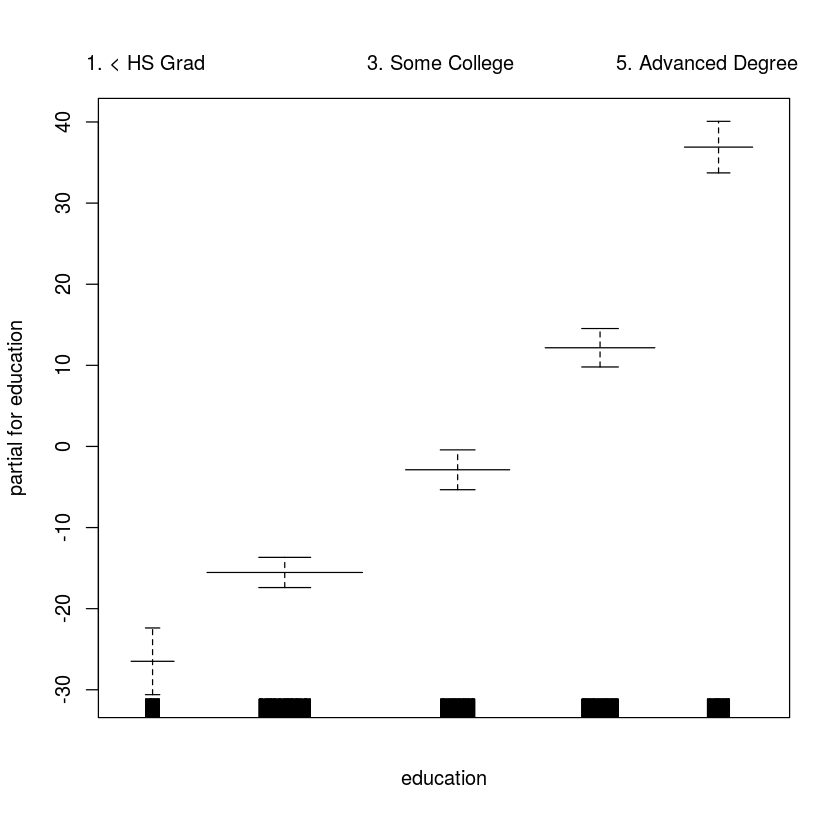

In [52]:
preds = predict(gam.m2, newdata=Wage)
gam.lo = gam(wage~s(year,df=4)+lo(age,span=0.7)+education, data=Wage)
plot.gam(gam.lo, se=TRUE, col="green")

In [53]:
gam.lo.i = gam(wage~lo(year,age,span=0.5)+education, data=Wage)

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"liv too small.    (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"lv too small.     (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"liv too small.    (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"lv too small.     (Discovered by lowesd)"

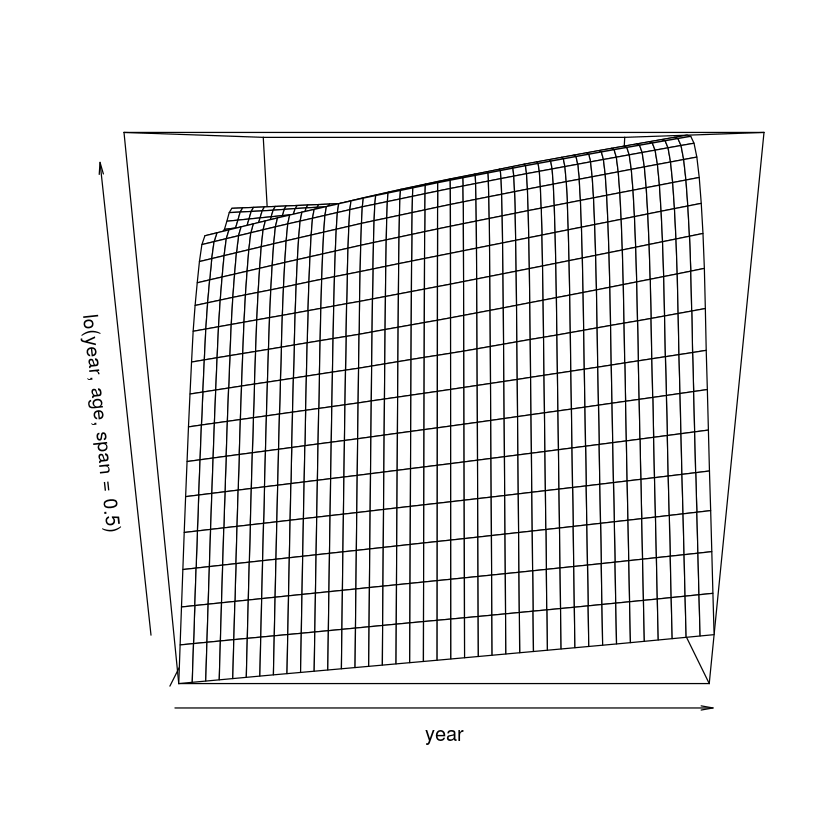

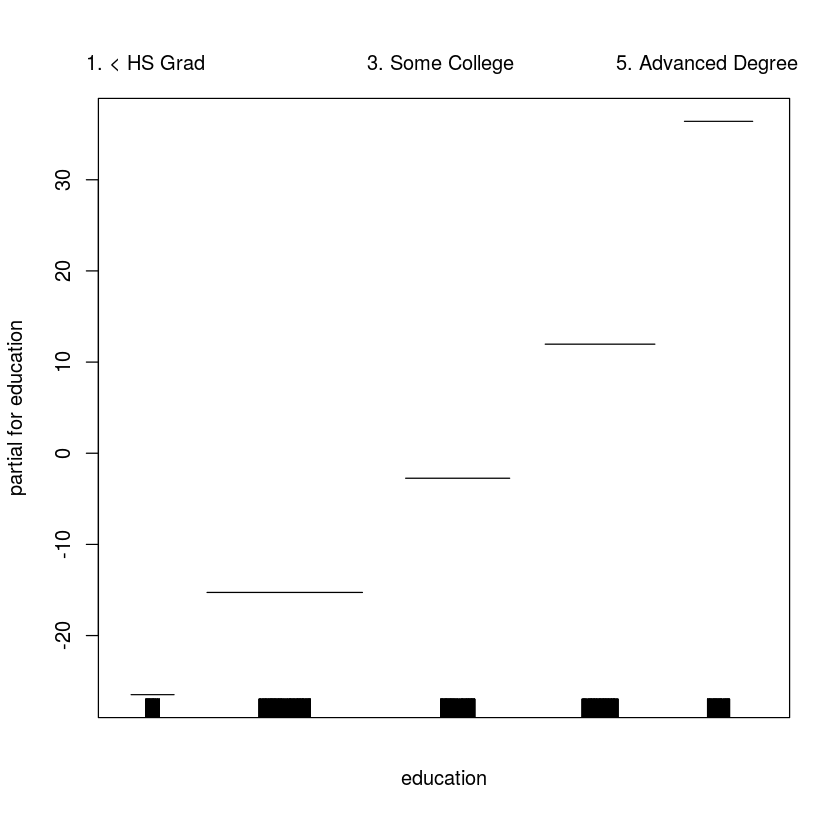

In [56]:
# 2D surface
plot(gam.lo.i)

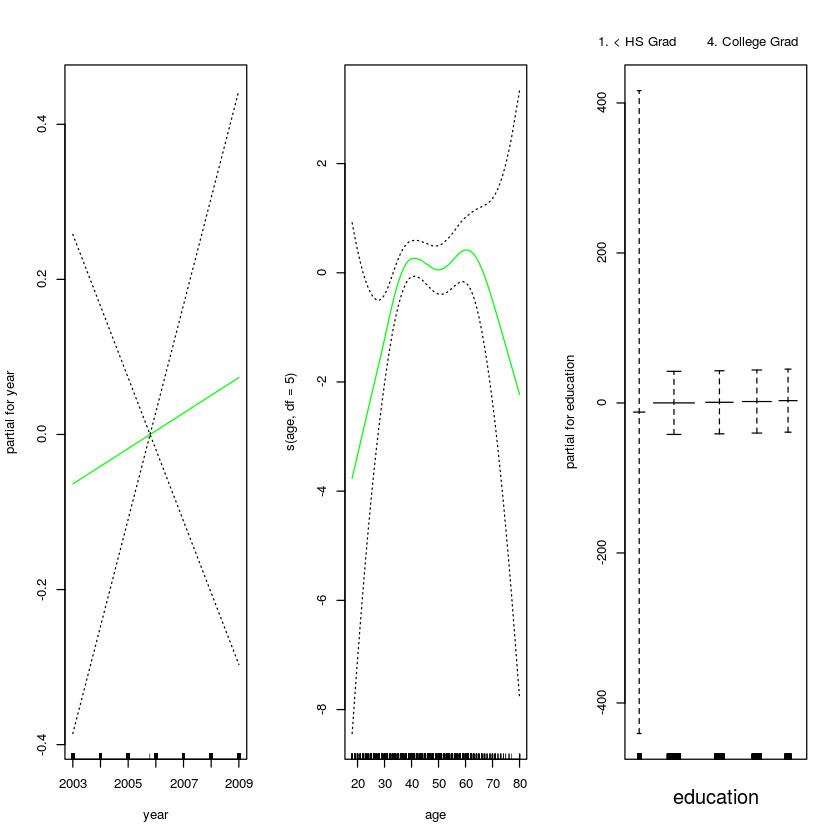

In [57]:
gam.lr = gam(I(wage>250)~year+s(age,df=5)+education, family=binomial, data=Wage)
par(mfrow=c(1,3))
plot(gam.lr, se=T, col="green")

In [60]:
table(Wage$education, I(Wage$wage>250))

                    
                     FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

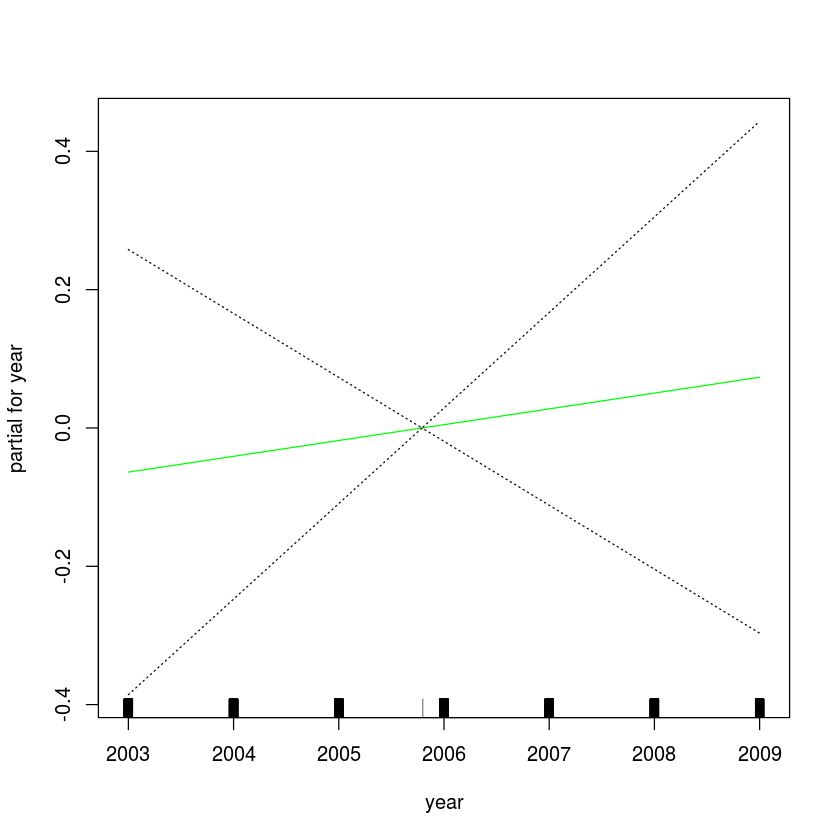

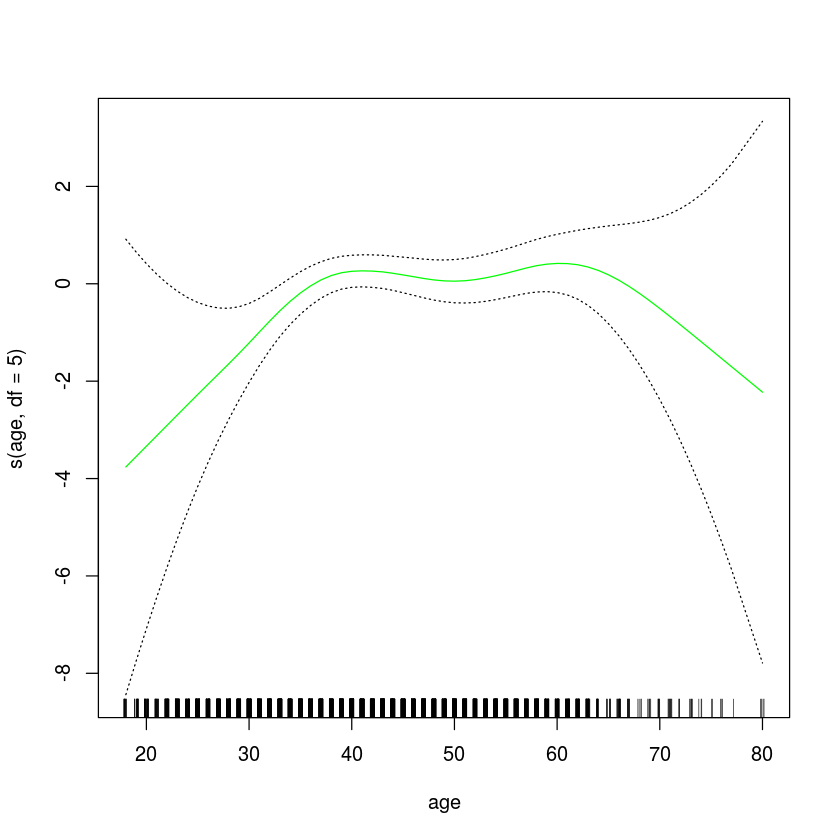

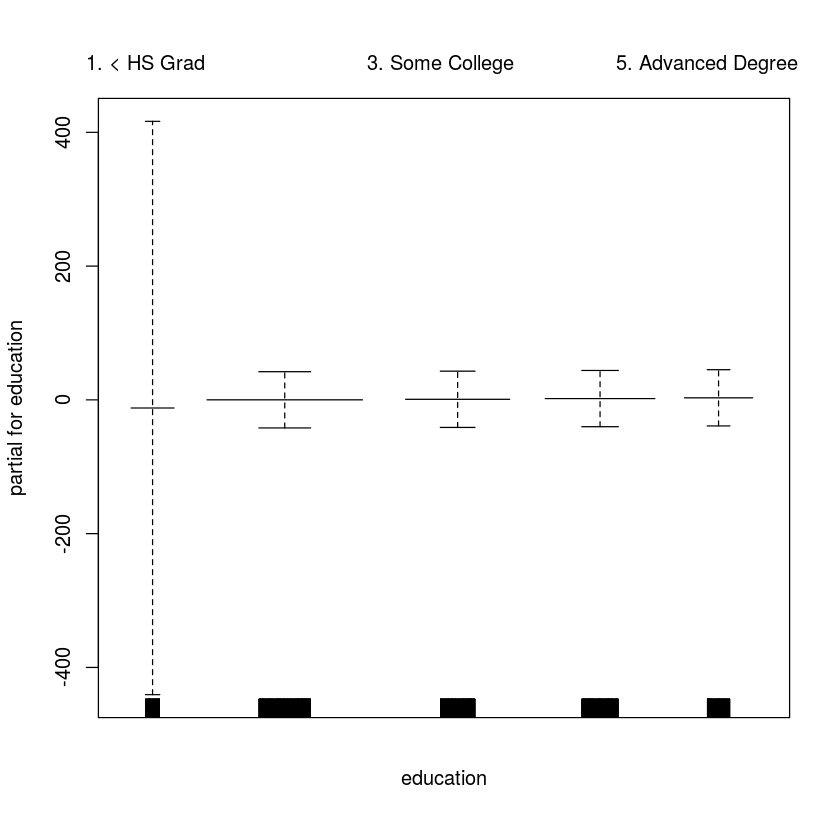

In [62]:
gam.lr.s = gam(I(wage>250)~year+s(age,df=5)+education, family=binomial, data=Wage, subset=(education!="1.  < HS Grad"))
plot(gam.lr.s, se=T, col="green")